In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
cols = ["Year", "Min_val", "Max_Val"]

df = pd.read_csv("./data/X.csv", names=cols)

df.head() #get the first five rows to make sure its orking 

,Year,Min_val,Max_Val
0,2024,32750,55620
1,2023,27400,40950
2,2022,25980,39739
3,2021,24840,39035
4,2020,24110,38675


In [3]:
X = df["Year"].values
y_min = df["Min_val"].values
y_max = df["Max_Val"].values


#assign the values in dataset

In [4]:

def LinearRegression(X, y, alpha, iter,missing_years):
    
    m = len(y)
    #m = X.shape[0] will get 26 which is the dataset rows

    b = 0#dont know why it worked
    w = 0
    
    costs =[]
    
    #iteration count for loop
    for i in range(iter):
        
        y_hat = [] #to store the predicted values z
        cost_sum = 0 
        for i in range(m):
            #model hypothesis and adding it to the list my predicitions
            
            pred = (w*X[i]) +b
            y_hat.append(pred)
            
            
            #calcultte cost
            cost = (pred - y[i]) **2
            
            cost_sum += cost
        
        avg_cost = cost_sum /(2*m) #MSE
        costs.append(avg_cost) #store my losses through iterations
        
        
        #COMPUTE GRADIENTS AND CALCULATE SGD
        
        b_gradient = 0
        w_gradient = 0
        
        for i in range(m):
            b_gradient += (y_hat[i] - y[i]) #bias terms gradient so no X feature
            w_gradient += (y_hat[i] - y[i] ) * X[i] #computing the weight term so there is X feature to multiply
            
        #to get the average for gradient based on the equation
        b_gradient /= m
        w_gradient /= m
        
        #UPDATE PARAMETERS AT THE SAME TIME
        b = b - alpha *b_gradient
        w = w - alpha * w_gradient
        
        pred_missing_years = [(w * year + b) for year in missing_years]
        #Missing years prediction inside missing years come from driver code under
        
    
    return b,w, costs, pred_missing_years
            

Predicted Min Prices for 2012-2018, 2025: [16052.92951333097, 16060.90810527031, 16068.88669720965, 16076.86528914899, 16084.843881088327, 16092.822473027667, 16100.801064967007, 16156.65120854238]
Predicted Max Prices for 2012-2018, 2025: [27102.77928076572, 27116.249844676448, 27129.720408587178, 27143.19097249791, 27156.66153640864, 27170.13210031937, 27183.602664230097, 27277.896611605207]
Weight of w after 100 iter  for min  7.978591939339243 for max  7.978591939339243
Bias term after 100 iter for min  0.002531380414541902 for max  0.004692377376449123
42368150.995645486 19946843.051590238


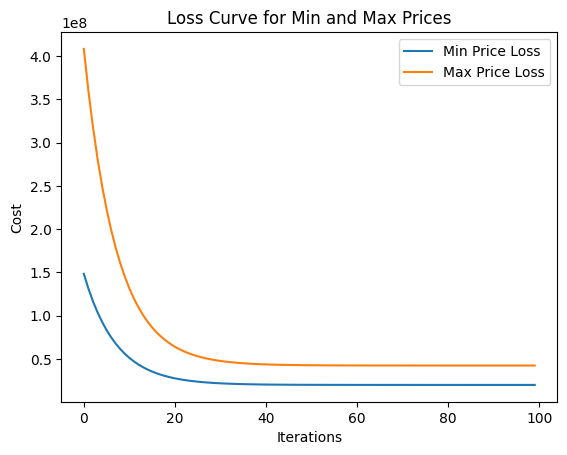

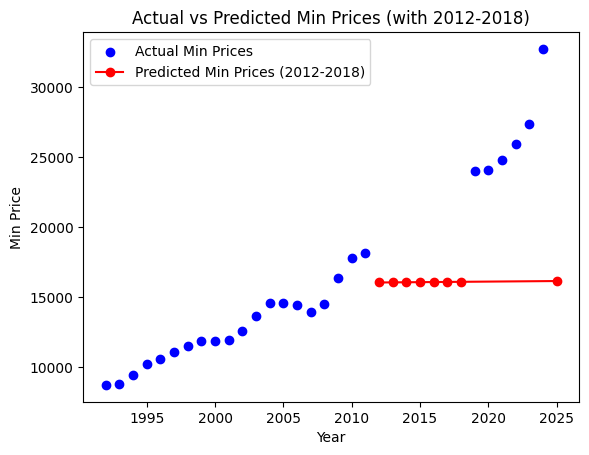

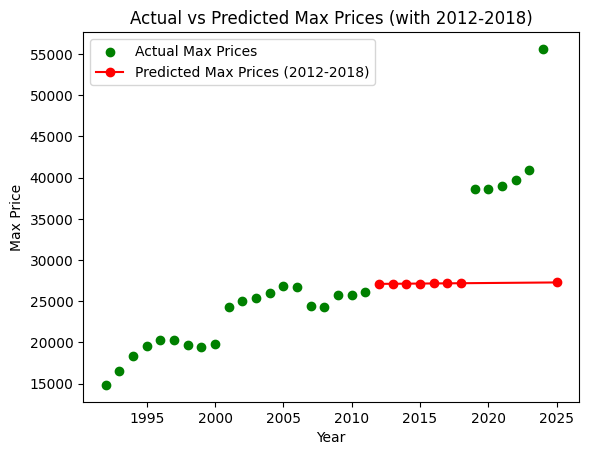

In [5]:
#initilaze the alpha and iterations
alpha = 0.00000048
iterations = 100

# missing years
missing_years = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2025])

# Train the model for max prices
b_min, w_min, cost_min, pred_min = LinearRegression(X, y_min, alpha, iterations, missing_years)

# Train the model for min prices
b_max, w_max, cost_max, pred_max = LinearRegression(X, y_max, alpha, iterations, missing_years)

# missing years prediction min and max
print(f"Predicted Min Prices for 2012-2018, 2025: {pred_min}")
print(f"Predicted Max Prices for 2012-2018, 2025: {pred_max}")

# see the w and b for min and max prices
print("Weight of w after 100 iter ","for min ",w_min, "for max ",w_min)
print("Bias term after 100 iter", "for min ", b_min, "for max ", b_max)

plt.plot(range(iterations), cost_min, label='Min Price Loss')
plt.plot(range(iterations), cost_max, label='Max Price Loss')
print(cost_max[-1], cost_min[-1])

#labels 
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss Curve for Min and Max Prices')
plt.legend()
plt.show()


# plot the model and actual data for min prices
plt.scatter(X, y_min, color='blue', label='Actual Min Prices')
plt.plot(missing_years, pred_min, color='red', marker='o', label='Predicted Min Prices (2012-2018)')
plt.xlabel('Year')
plt.ylabel('Min Price')
plt.legend()
plt.title('Actual vs Predicted Min Prices (with 2012-2018)')
plt.show()

# plot the model and actual data for max prices
plt.scatter(X, y_max, color='green', label='Actual Max Prices')
plt.plot(missing_years, pred_max, color='red', marker='o', label='Predicted Max Prices (2012-2018)')
plt.xlabel('Year')
plt.ylabel('Max Price')
plt.legend()
plt.title('Actual vs Predicted Max Prices (with 2012-2018)')
plt.show()




QUESTION: why did my initial w and b worked but if its other then this its not working?

In [6]:
#scale the data calcualte mean and std

def scale_features(data):
    
    mean = np.mean(data)
    std = np.std(data)
    
    scaled_data = (data - mean) / std
    return scaled_data, mean ,std
    
    

In [7]:
#unscale the data to see the prediction actually make sense
def unscale_data(scaled_data, mean, std):
    
    scaled_data = np.array(scaled_data) #convert it into nunpy array
    
    return (scaled_data * std) + mean

NOTE: Do the code more clean and do a function for scaling data and inverse it to make sense and be more clean


In [8]:
def ScaledLinearRegression(X, y, alpha, iter,missing_years, c):
    
    
    #length of the dataset and the initial weight and bias
    m = len(y)

    w = 1
    b = 1
    
    
    costs = []
    
    #Scaling the features and labels and missing years(as in feature inputs)
    
    X_scaled, X_mean, X_std = scale_features(X)
    y_scaled, y_mean, y_std = scale_features(y)
    missing_years_scaled = (missing_years - X_mean) / X_std
    
    
    for i in range(iter):
        
        y_hat = [] #store the prediction values
        cost_sum = 0
        for j in range(m):
            #model hypothesis
            pred = (w * X_scaled[j]) + b
            y_hat.append(pred)
            
            #calculate the cost
            
            cost = (pred - y_scaled[j]) ** 2
            cost_sum += cost
        
        avg_cost = cost_sum / (2*m) #Mean sqaurred error
        costs.append(avg_cost) #store the costs
        
        #Compute gradients and optimize
        
        b_gradient = 0
        w_gradient = 0 
        
        
        for z in range(m):
            
            b_gradient += (y_hat[z] - y_scaled[z]) #compute bias terms gradient
            w_gradient += (y_hat[z] - y_scaled[z]) * X_scaled[z] #compute weight terms gradient
            
        #to get the average for gradient based on the equation as in equations head 1/m
        b_gradient /= m
        w_gradient /= m
        
        
        #dynamic learning rate according to equation
        
        dynamic_alpha = alpha / (1 + c * i)
        
        
        #update the parameters bias and weight
        
        b = b - dynamic_alpha * b_gradient
        w = w - dynamic_alpha * w_gradient
        
        pred_missing_years = [(w * year + b) for year in missing_years_scaled] #predict the missing years 2012-2018
        
        pred_missing_years_unscaled = unscale_data(pred_missing_years, y_mean, y_std) #unscale the data to make sense

        
    return b, w, costs, pred_missing_years_unscaled
        
        
    

more clean code and do the driver code with plots clean like above


Predicted Min Prices for 2012-2018, 2025: [19696.27632686 20325.52025985 20954.76419284 21584.00812583
 22213.25205882 22842.49599181 23471.7399248  27876.44745573]
Predicted Max Prices for 2012-2018, 2025: [32203.49788988 33086.02866094 33968.559432   34851.09020306
 35733.62097412 36616.15174518 37498.68251624 43676.39791365]
Weight of w after 100 iter  for min  0.9707515438470152 for max  0.9707515438470152
Bias term after 100 iter for min  0.0006008432877295687 for max  0.0006008432877299006


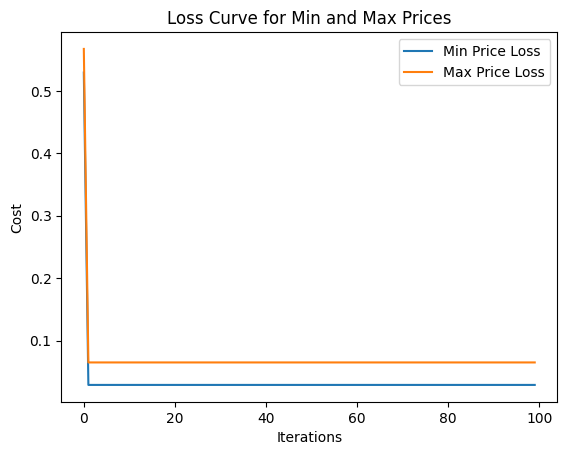

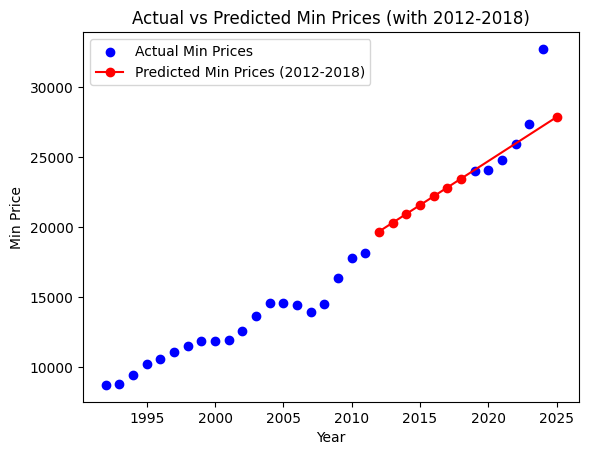

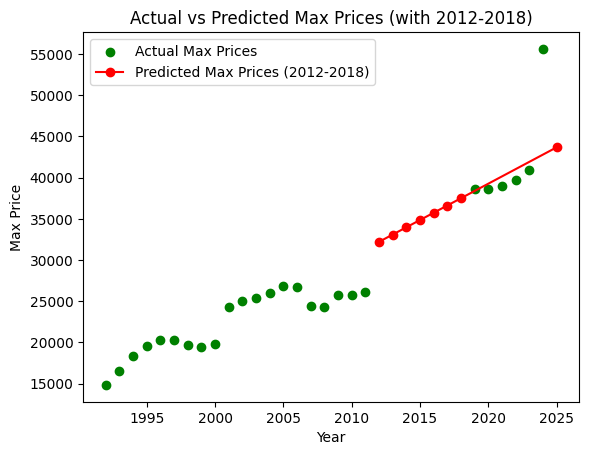

In [9]:
#initilaze the alpha and iterations
alpha = 0.999
iterations = 100
c = 10


# missing years
missing_years = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2025])

# Train the model for max prices
b_min, w_min, cost_min, pred_min = ScaledLinearRegression(X, y_min, alpha, iterations, missing_years, c)


# Train the model for min prices
b_max, w_max, cost_max, pred_max = ScaledLinearRegression(X, y_max, alpha, iterations, missing_years, c)

# missing years prediction min and max
print(f"Predicted Min Prices for 2012-2018, 2025: {pred_min}")
print(f"Predicted Max Prices for 2012-2018, 2025: {pred_max}")

# see the w and b for min and max prices
print("Weight of w after 100 iter ","for min ",w_min, "for max ",w_min)
print("Bias term after 100 iter", "for min ", b_min, "for max ", b_max)

# see the costs throguh iterations
plt.plot(range(iterations), cost_min, label='Min Price Loss')
plt.plot(range(iterations), cost_max, label='Max Price Loss')

#labels 
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss Curve for Min and Max Prices')
plt.legend()
plt.show()


# plot the model and actual data for min prices
plt.scatter(X, y_min, color='blue', label='Actual Min Prices')
plt.plot(missing_years, pred_min, color='red', marker='o', label='Predicted Min Prices (2012-2018)')
plt.xlabel('Year')
plt.ylabel('Min Price')
plt.legend()
plt.title('Actual vs Predicted Min Prices (with 2012-2018)')
plt.show()

# plot the model and actual data for max prices
plt.scatter(X, y_max, color='green', label='Actual Max Prices')
plt.plot(missing_years, pred_max, color='red', marker='o', label='Predicted Max Prices (2012-2018)')
plt.xlabel('Year')
plt.ylabel('Max Price')
plt.legend()
plt.title('Actual vs Predicted Max Prices (with 2012-2018)')
plt.show()





 ## Summary
 
For 2025 my models predcits different prices  normalized linear regression my model predicted for min prices: 27876.44745573 and the without feature scaled linear regression predicted 16156.65120854238 as min for max normalized linear regression predicted:43676.39791365 and base linear regression predcited: 27277.896611605207

Without the feature scaled and dynamic learning rated linear regression my bias is: for min  0.0006008432877295687 for max  0.0006008432877299006 and weight term is: for min  7.978591939339243 for max  7.978591939339243


For the scaled linear regression model and dynamic learning rate my bias is: or min  0.0006008432877295687 for max  0.0006008432877299006 and weight term is for min  0.9707515438470152 for max  0.9707515438470152

My thoughts on my models are that it is under performs due to a lack of the features with scaling the performance and accuracy has increased but the prediction is still not as good as it should be. With scaling and dynamic learning rate the models best accuracy achieved faster and the loss function decreased drastically but still underfits it won't be good in the unseen data as well as normal linear regression that has not scaling and dynamic learning rate. With more features and more data like thoosands of data the models performance could be better as well as using vectorization and dot product formulas also divide the dataset with %60 training %20 test and %20 for cross validation (optional)


The comparisons of the models are the normalized and dynamic learning rate linear regression has better performance it reaches the global minimum faster and i think it could have better performance in unseen data. 


I would buy 2025  ford ranger because my model predicts the price will decrase and it alligns with the real world data.
